In [2]:
import pandas as pd

df = pd.read_csv('shopping_trends.csv')
print("Розмір таблиці:", df.shape)
print("Наявність пропусків у даних:")
print(df.isnull().sum())
print("Типи даних для стовпців:")
print(df.dtypes)

Розмір таблиці: (3900, 19)
Наявність пропусків у даних:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64
Типи даних для стовпців:
Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season      

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('shopping_trends.csv')
selected_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
df_selected = df[selected_columns]
df_selected.columns = ['age', 'purchase_amount_usd', 'review_rating', 'previous_purchases']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)
df_scaled = pd.DataFrame(scaled_data, columns=df_selected.columns)
print(df_scaled)

           age  purchase_amount_usd  review_rating  previous_purchases
0     0.718913            -0.285629      -0.907584           -0.785831
1    -1.648629             0.178852      -0.907584           -1.616552
2     0.390088             0.558882      -0.907584           -0.162789
3    -1.517099             1.276716      -0.349027            1.637107
4     0.061263            -0.454531      -1.466141            0.391025
...        ...                  ...            ...                 ...
3895 -0.267563            -1.341267       0.628448            0.460252
3896  0.521618            -0.454531       1.047366            1.083293
3897  0.127028            -1.130139      -1.186862           -0.093563
3898 -0.004502             0.727784       0.069891           -0.093563
3899  0.521618             0.896686      -0.907584            0.529479

[3900 rows x 4 columns]


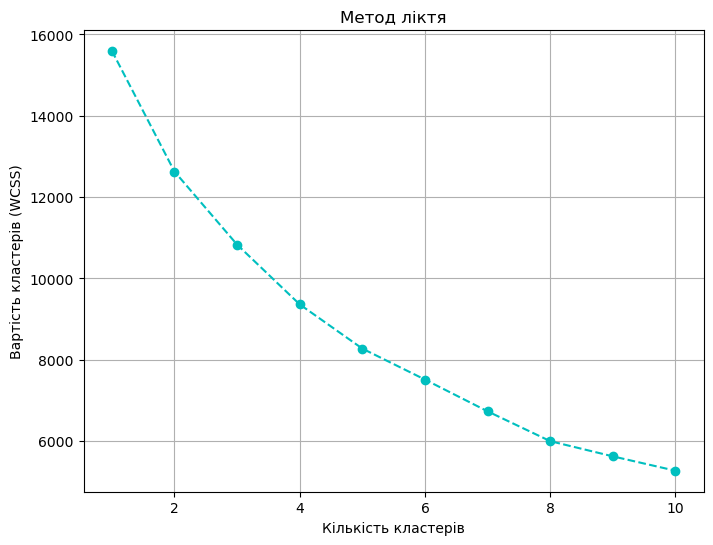

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='c')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Вартість кластерів (WCSS)')
plt.grid()
plt.show()

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
principal_df['Cluster'] = kmeans.labels_